In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv("Income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [14]:
#Plotting the data and applying kmean clustering
df.drop(['Name'], axis = 'columns', inplace = True)

In [15]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


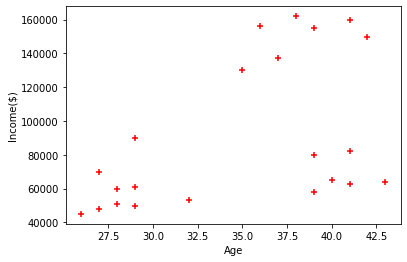

In [19]:
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df['Age'], df['Income($)'], marker = "+", color = "red")

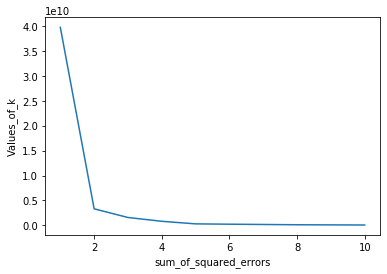

In [28]:
#Calulcating the k value using elbow method
num_of_cluster = range(1,11)
sum_of_squared_errors = []
for num in num_of_cluster:
    clf = KMeans(n_clusters = num)
    clf.fit(df[['Age','Income($)']])
    sum_of_squared_errors.append(clf.inertia_)
    
plt.xlabel("sum_of_squared_errors")
plt.ylabel("Values_of_k")
plt.plot(num_of_cluster, sum_of_squared_errors)
    

In [29]:
#As clearly seen elbow is at 3 so we should take k = 3
model = KMeans(n_clusters = 3)
model.fit(df[['Age','Income($)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
df['labels'] = model.labels_
df.head()


,Age,Income($),labels
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [49]:
df_0 = df[df.labels == 0]
df_1 = df[df.labels == 1]
df_2 = df[df.labels == 2]
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df_0['Age'],df_0['Income($)'], color = 'blue')
plt.scatter(df_1['Age'],df_1['Income($)'], color = 'red')
plt.scatter(df_2['Age'],df_2['Income($)'], color = 'green')

plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1], marker = "+", color ='blue', label = "1st_centroid")
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1], marker = "*", color ='red', label = "2nd_centroid")
plt.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1], marker = "^", color ='green', label = "3rd_centroid")


In [45]:
#The unusual trend in clustering is due to the fact that income feature has relatively too large values 
#than age so we have to do feature scaling 
min_max_scaler = MinMaxScaler()
df['age_sc'] = min_max_scaler.fit_transform(df[['Age']])
df['income_sc'] = min_max_scaler.fit_transform(df[['Income($)']])
df.head()

,Age,Income($),labels,age_sc,income_sc
0,27,70000,2,0.058824,0.213675
1,29,90000,2,0.176471,0.384615
2,29,61000,0,0.176471,0.136752
3,28,60000,0,0.117647,0.128205
4,42,150000,1,0.941176,0.897436


In [46]:
df.drop(['Age','Income($)'], axis = 'columns', inplace = True )

In [47]:
df.head()

,labels,age_sc,income_sc
0,2,0.058824,0.213675
1,2,0.176471,0.384615
2,0,0.176471,0.136752
3,0,0.117647,0.128205
4,1,0.941176,0.897436


In [54]:
model.fit(df[['age_sc','income_sc']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
df['label_sc'] = model.labels_
df.sample(5)

,labels,age_sc,income_sc,label_sc
11,0,0.000000,0.000000,0
9,1,0.529412,0.726496,2
1,2,0.176471,0.384615,0
15,0,0.352941,0.068376,0
3,0,0.117647,0.128205,0


In [ ]:
df.drop(['labels'], axis ='columns', inplace = True)

In [59]:
df.head()

,age_sc,income_sc,label_sc
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


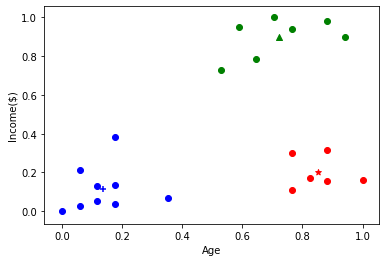

In [61]:
#Now Once again plotting the after feature scaling 
df_0 = df[df.label_sc == 0]
df_1 = df[df.label_sc == 1]
df_2 = df[df.label_sc == 2]
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df_0['age_sc'],df_0['income_sc'], color = 'blue')
plt.scatter(df_1['age_sc'],df_1['income_sc'], color = 'red')
plt.scatter(df_2['age_sc'],df_2['income_sc'], color = 'green')

plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1], marker = "+", color ='blue', label = "1st_centroid")
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1], marker = "*", color ='red', label = "2nd_centroid")
plt.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1], marker = "^", color ='green', label = "3rd_centroid")


In [ ]:
#Yahoo! we have done it 